In [1]:
from ultralytics import YOLO
# Burada kullanacağımız modeli seçiyoruz.
model= YOLO("yolov8n-pose.pt") 

In [2]:
import cv2
import numpy as np

Pose estimation kullnarak insan vücudundaki bazı önemli yerlerin konumunu bulabiliriz.
Örneğin omuzların, ayakların veya kolların konumunu bulabiliriz. Bu noktaları ve hangi indise sahip olduklarını aşağıdaki resimden görebilirsiniz. 
Ben bir kişinin düşüp düşmediğini bulmak için şöyle bir mantık yürüttüm. Eğer 6. nokta 12.noktadan daha aşağıdaysa ya da 12.nokta 16.noktadan daha aşağıdaysa ya da 14.nokta 16. noktadan daha aşağıdaysa bu kişi düşmüştür dedim. 
Bu noktaların y koordinatlarını bulup kıyaslama yaptım. Bu arada resimde noktaların koordinatı aşağıya inildikçe artar. Yani yukarıdaki bir noktanın koordinatı aşağıdaki bir noktanın koordinatından daha düşüktür. bu yüzüden kıyaslama yaparken > işaretini kullandım. Çünkü daha büyükse daha aşağıdadır.

Bu arada burada basit mantık kullandım. Bu benim yüklediğim resim ya da videolarda düzgün çalıştı. Fakat başka videolarda bu kadar düzgün çalışmayabilir. Ek parametre ayarları yapılması gerekebilir.

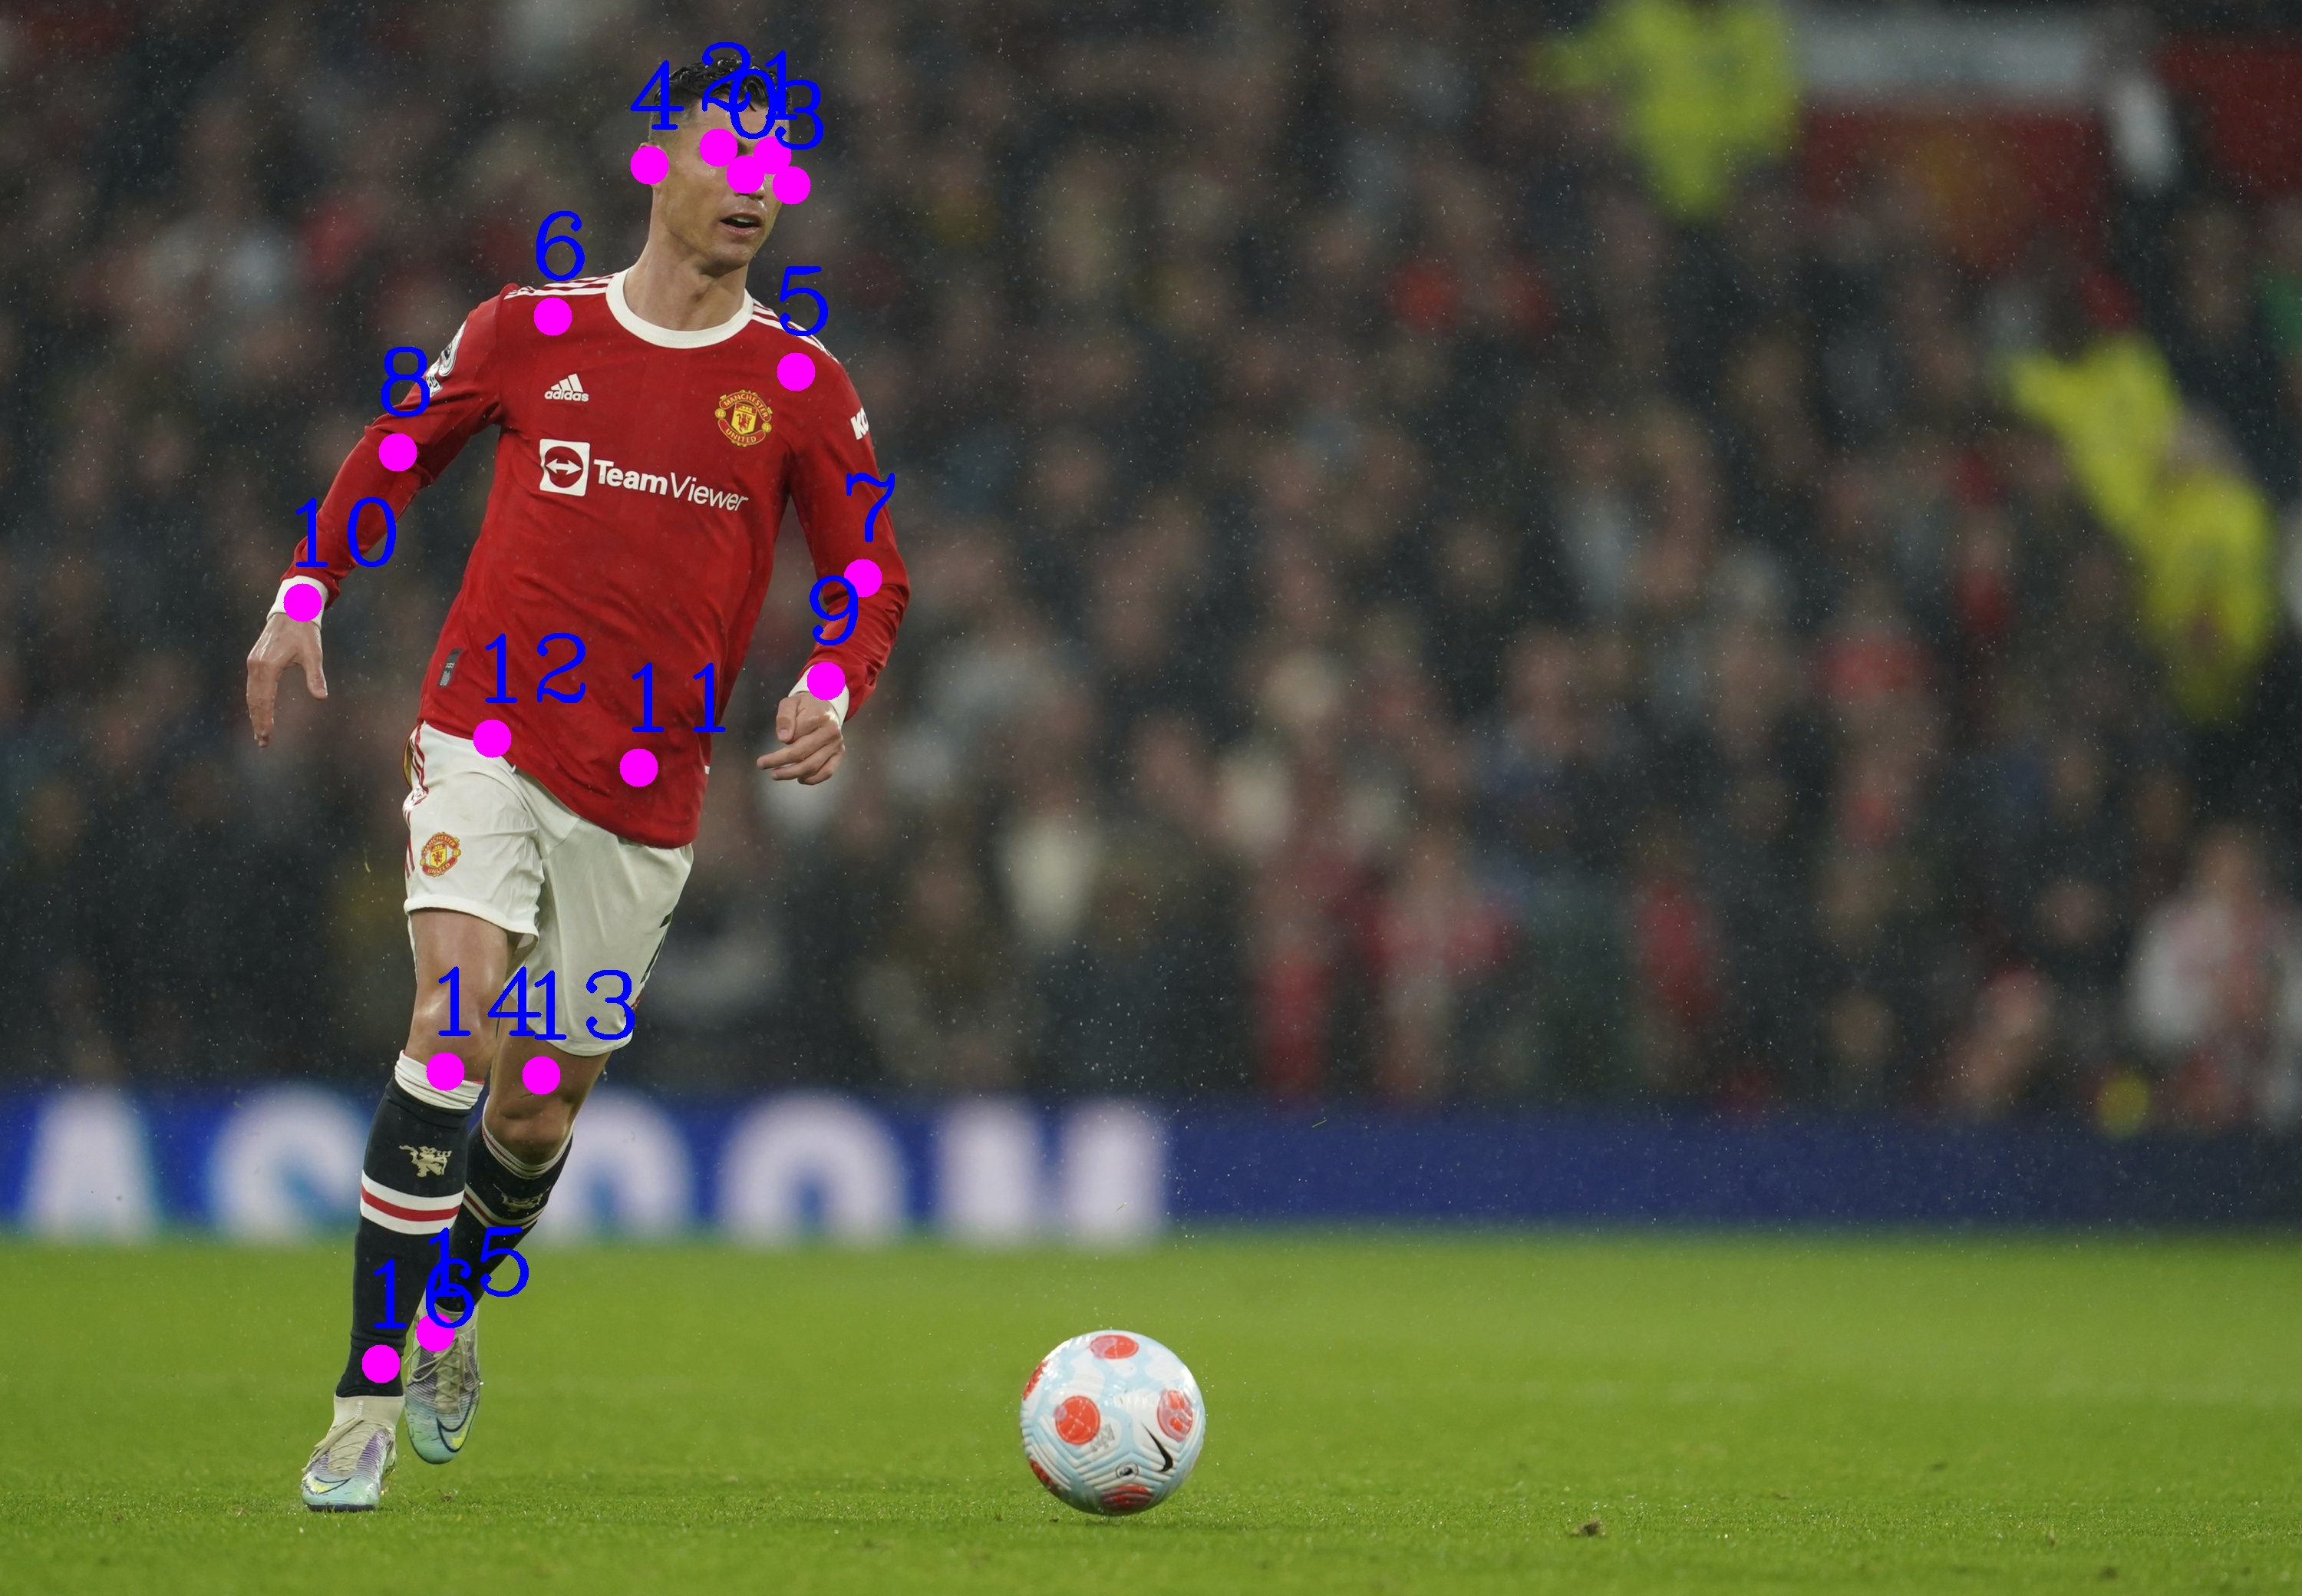

# Resim için 

In [3]:

font = cv2.FONT_HERSHEY_SIMPLEX
img=cv2.imread('img.jpg')
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = model(rgb_img,verbose=False) 
labels=results[0].names


for i in range(len(results[0].boxes)):
    
    x1,y1,x2,y2=results[0].boxes.xyxy[i]
    score=results[0].boxes.conf[i]
   
    x1,y1,x2,y2,score=int(x1),int(y1),int(x2),int(y2),float(score)
    keypoint=results[0].keypoints.xy[i]
    if score<0.5:
        continue
    
    py1=keypoint[6][1]
    py2=keypoint[12][1]
    py3=keypoint[14][1]
    py4=keypoint[16][1]

    if py1>py2 or py2>py4 or py3>py4:
        cv2.putText(img, 'Fall',(x1,y1-10), font, 2, (102,0,153), 2)
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),4)

cv2.imshow("kamera",img)


cv2.waitKey()
cv2.destroyAllWindows()

# Video için

In [5]:
kamera= cv2.VideoCapture('video10.mp4')
font = cv2.FONT_HERSHEY_SIMPLEX

while True:


    ret,kare=kamera.read()
    rgb_img=cv2.cvtColor(kare,cv2.COLOR_BGR2RGB)
    results = model(rgb_img,verbose=False) 
    labels=results[0].names


    for i in range(len(results[0].boxes)):

        x1,y1,x2,y2=results[0].boxes.xyxy[i]
        score=results[0].boxes.conf[i]

        x1,y1,x2,y2,score=int(x1),int(y1),int(x2),int(y2),float(score)
        keypoint=results[0].keypoints.xy[i]
        if score<0.5:
            continue

        py1=keypoint[6][1]
        py2=keypoint[12][1]
        py3=keypoint[14][1]
        py4=keypoint[16][1]

        if py1>py2 or py2>py4 or py3>py4:
            cv2.putText(kare, 'Fall',(x1,y1-10), font, 5, (102,0,153), 4)
            cv2.rectangle(kare,(x1,y1),(x2,y2),(0,0,255),4)
            
    

    cv2.imshow("kamera",kare)
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
kamera.release()
cv2.destroyAllWindows()